In [1]:
import pandas as pd
import re

# Example Data
In the following, it will be demonstrated how an asset tree in the required format for the Constraint Detection Add-on can be built. The Constraint Detection Add-on requires a layout where all assets on the bottom of the hierarchy are controllers. All signals linked to one controller must be either a 'Controller Output', a 'Setpoint', a 'Process Variable', a 'Mode' or a 'Manipulated Variable'. The correct naming is of high importance and other signal types won't be processed by the Add-on. For the demonstration, a dataset containing 12 signals from 3 controllers will be used. Every controller has a controller output, setpoint, process variable, and auto manual mode. The asset structure, which will be created, is shown below.
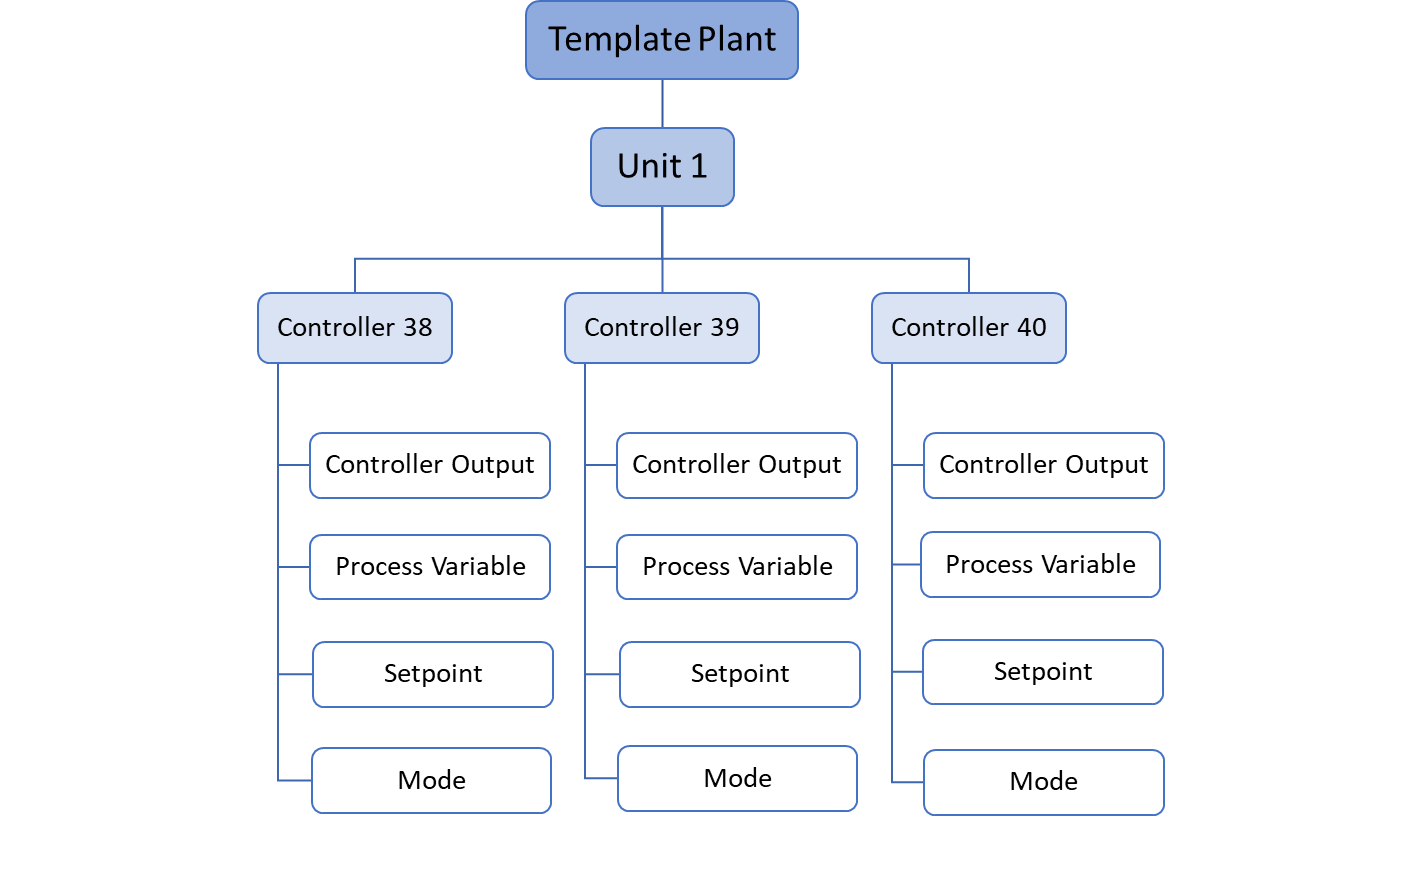

The data for the template asset tree is in a csv file. Therefore, the signals will imported to the Data Lab environment and then pushed to the workbench. The push_results dataframe shows the metadata of the pushed signals. If your data is already available in the workbench, you can use `spy.search` to get a metadata table of all signals you want to be in your asset tree.

In [5]:
csv_file = pd.read_csv('SA_data_for_asset_structure.csv', parse_dates=['TimeStamp_TimeStamp'], index_col='TimeStamp_TimeStamp')
csv_file.head()

,controller40_Output,controller40_Flow,controller40_Sp,controller40_AutoManualMode,controller38_Speed,controller38_Flow,controller38_Sp,controller38_AutoManualMode,controller39_Speed,controller39_Flow,controller39_Sp,controller39_AutoManualMode
TimeStamp_TimeStamp,,,,,,,,,,,,
2017-01-20 06:00:00,0.6383,-0.4478,-0.0088,0.0316,0.4573,0.5163,0.3275,0.0019,0.8026,0.8612,0.347,0.0019
2017-01-20 06:00:10,0.6384,-0.4478,-0.0088,0.0316,0.4581,0.5143,0.3275,0.0019,0.8031,0.8609,0.347,0.0019
2017-01-20 06:00:20,0.6384,-0.4478,-0.0088,0.0316,0.4579,0.5163,0.3275,0.0019,0.8028,0.8607,0.347,0.0019
2017-01-20 06:00:30,0.6385,-0.4478,-0.0088,0.0316,0.4577,0.5137,0.3275,0.0019,0.8027,0.8605,0.347,0.0019
2017-01-20 06:00:40,0.6386,-0.4478,-0.0088,0.0316,0.4581,0.5131,0.3275,0.0019,0.8031,0.8603,0.347,0.0019


In [6]:
push_results = spy.push(data=csv_file)
push_results

,Count,Result,Time
controller40_Output,256168,Success,00:00:56.76
controller40_Flow,267840,Success,00:00:52.10
controller40_Sp,267759,Success,00:00:55.95
controller40_AutoManualMode,267841,Success,00:00:53.92
controller38_Speed,267841,Success,00:00:56.09
controller38_Flow,267839,Success,00:00:52.99
controller38_Sp,267760,Success,00:00:50.66
controller38_AutoManualMode,267841,Success,00:00:56.32
controller39_Speed,267841,Success,00:00:30.36
controller39_Flow,267841,Success,00:00:29.29


# Build Assets and Paths
To build an asset tree, a `Build Asset` and `Build Path` column have to be defined in the metadata. More information on this topic can be found in the `spy.assets` documentation. To use the Constraint Detection Add-on, the `Build Asset` column must specify a controller. In this example, the controllers are named using the word "Controller" followed by the individual controller number. Any other naming for the controller assets is accepted by the Add-on. For example, you could also use "FIC103" or "Reactor Temperature Control" as a name for the `Build Asset` column. The `Build Path` column points to you controller asset. It can be defined for every signal individually. Here, all controllers will be found under the same path. For example, one controller asset in this asset tree is 'Controller 40' and it lives under the path 'Template Plant >> Unit 1'.

In [37]:
pd.set_option('mode.chained_assignment', None)

# generate an empty column for 'Build Asset'
push_results['Build Asset'] = ''

# Loop through every row in the metadata to get a formatted asset name
for i in range(push_results.shape[0]):
    # get the controller number using the re package
    controller_number = re.findall(r'\d+', push_results['Name'][i])
    # assign the the asset name to the 'Build Asset column'
    push_results['Build Asset'][i] = 'Controller ' + controller_number[0]

# generate the 'Build Path' column
push_results['Build Path'] = 'Template Plant >> Unit 1'
push_results

,Push Count,Push Time,Push Result,Name,ID,Type,Build Asset,Build Path
controller40_Output,256168.0,0:00:56.759421,Success,controller40_Output,5B2A2578-4842-43F9-A8DA-A8188C538283,StoredSignal,Controller 40,Template Plant >> Unit 1
controller40_Flow,267840.0,0:00:52.102023,Success,controller40_Flow,ED5E2969-E832-4C5F-BAC5-F8C5E00A45FE,StoredSignal,Controller 40,Template Plant >> Unit 1
controller40_Sp,267759.0,0:00:55.952808,Success,controller40_Sp,1938974F-62CE-4217-B513-4393B5CCCD06,StoredSignal,Controller 40,Template Plant >> Unit 1
controller40_AutoManualMode,267841.0,0:00:53.917485,Success,controller40_AutoManualMode,328F3240-8EEF-4BEB-ADF7-41BFEC155B3A,StoredSignal,Controller 40,Template Plant >> Unit 1
controller38_Speed,267841.0,0:00:56.094264,Success,controller38_Speed,5E7F4A3F-F3EA-447F-A0B3-75DE3F7698B7,StoredSignal,Controller 38,Template Plant >> Unit 1
controller38_Flow,267839.0,0:00:52.991815,Success,controller38_Flow,38E55ECE-880D-42FD-9416-C7CAA6D114C2,StoredSignal,Controller 38,Template Plant >> Unit 1
controller38_Sp,267760.0,0:00:50.663328,Success,controller38_Sp,4B14053F-FD4B-44C4-8F43-50417F57ADFE,StoredSignal,Controller 38,Template Plant >> Unit 1
controller38_AutoManualMode,267841.0,0:00:56.323038,Success,controller38_AutoManualMode,90AE36F3-C056-420D-BE50-D8158B5581D6,StoredSignal,Controller 38,Template Plant >> Unit 1
controller39_Speed,267841.0,0:00:30.361248,Success,controller39_Speed,56E709BC-0612-4D6D-BCC2-84B6900837E4,StoredSignal,Controller 39,Template Plant >> Unit 1
controller39_Flow,267841.0,0:00:29.285851,Success,controller39_Flow,F3A51CB9-AB15-419C-B822-4E7F57FB4EBA,StoredSignal,Controller 39,Template Plant >> Unit 1


# Asset Structure Class
`spy.assets` requires a class that defines the attributes which can be connected to an asset. Since all the assets in the asset structure should be controllers, the attributes will be control signals: Controller output, setpoint, auto manual mode, process variable and manipulated variable. The names of the attributes must not be changed, as this naming is required for the Constraint Detection Add-on. Instead, the returned signals need to be adapted so that they fit your data.

In [38]:
from seeq.spy.assets import Asset, ItemGroup

class AssetStructureClass(Asset):
    
    @Asset.Attribute()
    def Controller_Output(self, metadata):
        df = metadata[metadata['Name'].str.endswith('_Output')]
        df = df.append(metadata[metadata['Name'].str.endswith('Speed')])
        return df
    
    @Asset.Attribute()
    def Setpoint(self, metadata):
        df = metadata[metadata['Name'].str.endswith('_Sp')]
        return df
    
    @Asset.Attribute()
    def Mode(self, metadata):
        df = metadata[metadata['Name'].str.endswith('_AutoManualMode')]
        return df
    
    @Asset.Attribute()
    def Process_Variable(self, metadata):
        df = metadata[metadata['Name'].str.endswith('_Flow')]
        df = df.append(metadata[metadata['Name'].str.endswith('_Level')])
        df = df.append(metadata[metadata['Name'].str.endswith('_AirFlow')])
        df = df.append(metadata[metadata['Name'].str.endswith('_Weightometer')])
        return df
    
    @Asset.Attribute()
    def Manipulated_Variable(self, metadata):
        df = metadata[metadata['Name'].str.endswith('_MV')]
        return df

# Metadata
Using the `spy.assets.build` function, the asset structure is generated from the class and the defined `Build Asset` and `Build Path` column. If there are attributes which cannot be matched to the metadata, the function wil throw an error. Since the example data does not contain any manipulated variables, an error will show up for all 3 controllers saying that no matching metadata row was found for the Manipulated Variable attribute. In this case, this is not a problem because all other signals get matched successfully. The finished asset structure can be pushed to the workbench.

In [39]:
metadata_asset_structure = spy.assets.build(AssetStructureClass, metadata = push_results)

,Build Path,Build Asset,Build Template,Build Result
0,Template Plant >> Unit 1,Controller 40,AssetStructureClass,"The following issues could not be resolved:(If the cause is not immediately obvious, make sure to check for circular references.)""Template Plant >> Unit 1 >> Controller 40 >> Manipulated_Variable [on AssetStructureClass class]"": No matching metadata row found"
1,Template Plant >> Unit 1,Controller 38,AssetStructureClass,"The following issues could not be resolved:(If the cause is not immediately obvious, make sure to check for circular references.)""Template Plant >> Unit 1 >> Controller 38 >> Manipulated_Variable [on AssetStructureClass class]"": No matching metadata row found"
2,Template Plant >> Unit 1,Controller 39,AssetStructureClass,"The following issues could not be resolved:(If the cause is not immediately obvious, make sure to check for circular references.)""Template Plant >> Unit 1 >> Controller 39 >> Manipulated_Variable [on AssetStructureClass class]"": No matching metadata row found"


In [31]:
spy.push(metadata=metadata_asset_structure)

,Push Count,Push Time,ID,Type,Referenced Name,Reference,Name,Asset,Asset Object,Path,Template,Build Result,Formula Parameters,Datasource Class,Datasource ID,Data ID,Push Result
0,256168.0,0 days 00:00:56.759421,FED732F8-5E0A-4401-8C6E-3110D7024E8B,CalculatedSignal,controller40_Output,True,Controller Output,Controller 40,Template Plant >> Unit 1 >> Controller 40,Template Plant >> Unit 1,AssetStructureClass,Success,signal=5B2A2578-4842-43F9-A8DA-A8188C538283,Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
1,267841.0,0 days 00:00:53.917485,C885CF72-6F53-4DD9-99B2-403447C11B24,CalculatedSignal,controller40_AutoManualMode,True,Mode,Controller 40,Template Plant >> Unit 1 >> Controller 40,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=328F3240-8EEF-4BEB-ADF7-41BFEC155B3A],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
2,267840.0,0 days 00:00:52.102023,D49D499B-4075-4E1C-98DF-B67D57D13E55,CalculatedSignal,controller40_Flow,True,Process Variable,Controller 40,Template Plant >> Unit 1 >> Controller 40,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=ED5E2969-E832-4C5F-BAC5-F8C5E00A45FE],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
3,267759.0,0 days 00:00:55.952808,901C08FB-01BB-41BE-AF1E-31781FF8E30B,CalculatedSignal,controller40_Sp,True,Setpoint,Controller 40,Template Plant >> Unit 1 >> Controller 40,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=1938974F-62CE-4217-B513-4393B5CCCD06],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
4,267841.0,0 days 00:00:56.094264,BBD3FBA8-06E7-4491-A66F-0DBE0CF03400,CalculatedSignal,controller38_Speed,True,Controller Output,Controller 38,Template Plant >> Unit 1 >> Controller 38,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=5E7F4A3F-F3EA-447F-A0B3-75DE3F7698B7],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
5,267841.0,0 days 00:00:56.323038,0C901E5F-0A54-4DE4-8F28-E4D377414F5E,CalculatedSignal,controller38_AutoManualMode,True,Mode,Controller 38,Template Plant >> Unit 1 >> Controller 38,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=90AE36F3-C056-420D-BE50-D8158B5581D6],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
6,267839.0,0 days 00:00:52.991815,A080B049-5CD8-4A2F-AE97-561E4EEE267D,CalculatedSignal,controller38_Flow,True,Process Variable,Controller 38,Template Plant >> Unit 1 >> Controller 38,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=38E55ECE-880D-42FD-9416-C7CAA6D114C2],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
7,267760.0,0 days 00:00:50.663328,45E491C4-962F-46E7-B2AB-D0EAB6F0A257,CalculatedSignal,controller38_Sp,True,Setpoint,Controller 38,Template Plant >> Unit 1 >> Controller 38,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=4B14053F-FD4B-44C4-8F43-50417F57ADFE],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
8,267841.0,0 days 00:00:30.361248,C39295B3-CEA9-40F4-B465-086A9507EA89,CalculatedSignal,controller39_Speed,True,Controller Output,Controller 39,Template Plant >> Unit 1 >> Controller 39,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=56E709BC-0612-4D6D-BCC2-84B6900837E4],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
9,267841.0,0 days 00:00:27.040664,6D9AE8BA-593F-4EB2-9B42-2CC8901383C4,CalculatedSignal,controller39_AutoManualMode,True,Mode,Controller 39,Template Plant >> Unit 1 >> Controller 39,Template Plant >> Unit 1,AssetStructureClass,Success,[signal=FD84193C-5A4A-4EFE-A472-FB6010DB58D5],Seeq Data Lab,Seeq Data Lab,[11F178F3-F83D-404E-9F84-638E5CD79EBD] {Signal...,Success
